 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [200]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [201]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [202]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [203]:
# Drop nulls
whale = whale.dropna()
whale.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [204]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo.sort_index(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [205]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [206]:
# Drop nulls
algo = algo.dropna()
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [207]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [208]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [209]:
# Fix Data Types
sp500["Close"] = sp500["Close"].str.replace("$", "")
sp500["Close"] = sp500["Close"].astype("float")
sp500["Close"]

<ipython-input-209-77fd35237a03>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [210]:
# Calculate Daily Returns
sp500_returns = sp500.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [211]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()


Close    0
dtype: int64

In [212]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={
    "Close": "S&P 500"
})

sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [213]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale, algo, sp500_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

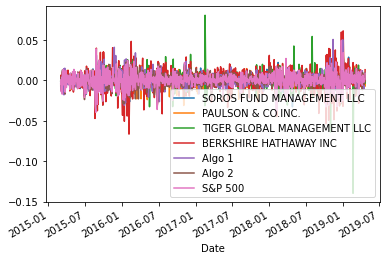

In [214]:
# Plot daily returns of all portfolios
all_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

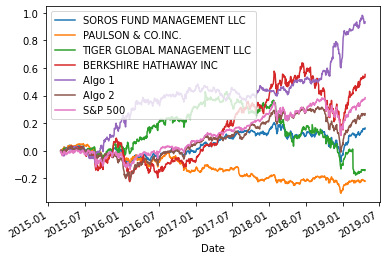

In [215]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_returns).cumprod()-1

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

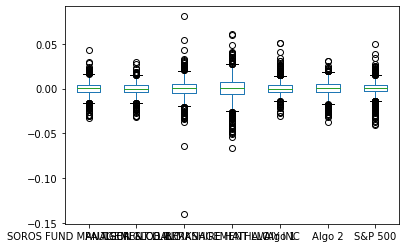

In [216]:
# Box plot to visually show risk
all_returns.plot.box()

### Calculate Standard Deviations

In [217]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = all_returns.std()
all_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [218]:
# Calculate  the daily standard deviation of S&P 500
print(all_returns_std["S&P 500"])

# Determine which portfolios are riskier than the S&P 500
all_returns_std = all_returns_std.sort_values(ascending=False)
all_returns_std

0.008553731597758204


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [219]:
# Calculate the annualized standard deviation (252 trading days)
all_annualized_std = all_returns_std * np.sqrt(252)
all_annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

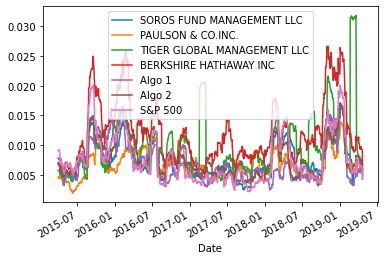

In [220]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling21_std = all_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_rolling21_std.plot()

### Calculate and plot the correlation

In [221]:
# Calculate the correlation
all_correlation = all_returns.corr()

# Display de correlation matrix
all_correlation.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

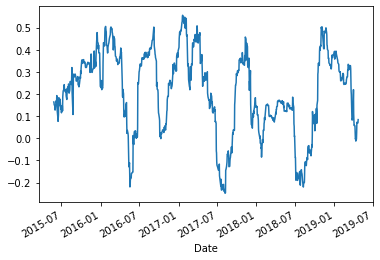

In [222]:
# Calculate covariance of a single portfolio
algo1_covar_roll60day = all_returns["Algo 1"].rolling(window=60).cov(all_returns["S&P 500"])

# Calculate variance of S&P 500
sp500_var_roll60day = all_returns["S&P 500"].rolling(window=60).var()


# Computing beta
algo1_beta_roll60day = algo1_covar_roll60day / sp500_var_roll60day

# Plot beta trend
algo1_beta_roll60day.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

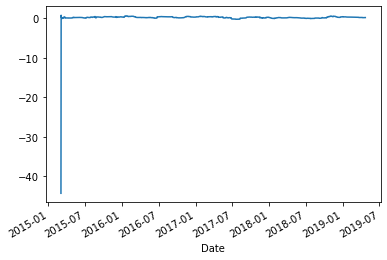

In [223]:
# Use `ewm` to calculate the rolling window


# Calculate covariance of a single portfolio
algo1_covar_ewm = all_returns["Algo 1"].ewm(halflife=21).cov(all_returns["S&P 500"])

# Calculate variance of S&P 500
sp500_var_ewm = all_returns["S&P 500"].ewm(halflife=21).var()


# Computing beta
algo1_beta_ewm = algo1_covar_ewm / sp500_var_ewm

# Plot beta trend
algo1_beta_ewm.plot()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [224]:
# Annualized Sharpe Ratios
all_sharpe = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

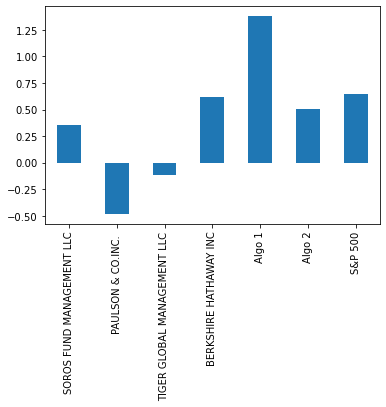

In [225]:
# Visualize the sharpe ratios as a bar plot
all_sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithim 1 is by far the best performer, with a Sharpe ratio of 1.38. This is the only strategy with a ratio above 1, indicating it is an acceptable investment to make. This beats the market (+0.65) and the next highest whale, Berkshire Hathaway (+0.62).  After that Algorithim 2 is better than all the whales with a ratio of 0.50, excluding Berkshire, and it does not beat the market.  So while it is competitive compared to the other whales, it is below a 1.0 indicating a sub-optimal investment and it is not a market beater like Algorithim 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [226]:
# Reading data from 1st stock
goog_data = Path("Resources/goog_historical.csv")
goog = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog.sort_index(inplace=True)
goog = goog.drop(columns=["Symbol"])
goog = goog.rename(columns={
    "Trade Date": "Date",
    "NOCP": "GOOG"
})
goog.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [227]:
# Reading data from 2nd stock
aapl_data = Path("Resources/aapl_historical.csv")
aapl = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl.sort_index(inplace=True)
aapl = aapl.drop(columns=["Symbol"])
aapl = aapl.rename(columns={
    "Trade Date": "Date",
    "NOCP": "AAPL"
})
aapl.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [228]:
# Reading data from 3rd stock
cost_data = Path("Resources/cost_historical.csv")
cost = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost.sort_index(inplace=True)
cost = cost.drop(columns=["Symbol"])
cost = cost.rename(columns={
    "Trade Date": "Date",
    "NOCP": "COST"
})
cost.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [229]:
# Combine all stocks in a single DataFrame
new_port = pd.concat([goog, aapl, cost], axis="columns", join="inner")
new_port.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [230]:
# Reset Date index - Already done on Import


In [231]:
# Reorganize portfolio data by having a column per symbol - Already done on import


In [232]:
# Calculate daily returns
new_port_returns = new_port.pct_change()

# Drop NAs
new_port_returns = new_port_returns.dropna()

# Display sample data
new_port_returns.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [233]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_returns_weighted = (weights[0] * new_port_returns["GOOG"]) + (weights[1] * new_port_returns["AAPL"]) + (weights[2] * new_port_returns["COST"])

# Display sample data
port_returns = pd.DataFrame(port_returns_weighted)
port_returns = port_returns.rename(columns={
    0: "New Portfolio"
})
port_returns.head()


,New Portfolio
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [234]:
# Join your returns DataFrame to the original returns DataFrame
orig_with_new_port = pd.concat([all_returns, port_returns], axis="columns", join="inner")
orig_with_new_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,New Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [235]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
orig_with_new_port.isnull().sum()
orig_with_new_port.dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,New Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [236]:
# Calculate the annualized `std`
orig_with_new_port_std = orig_with_new_port.std()
orig_with_new_port_std


SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
New Portfolio                  0.013323
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

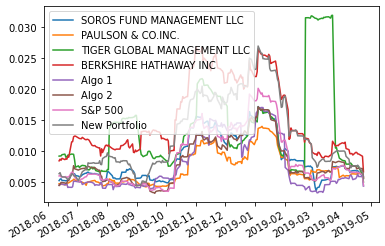

In [237]:
# Calculate rolling standard deviation
orig_with_new_rolling21_std = orig_with_new_port.rolling(window=21).std()

# Plot the rolling standard deviation
orig_with_new_rolling21_std.plot()


### Calculate and plot the correlation

In [238]:
# Calculate and plot the correlation
orig_with_new_correlation = orig_with_new_port.corr()
orig_with_new_correlation.style.background_gradient(cmap='coolwarm')


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,New Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
New Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

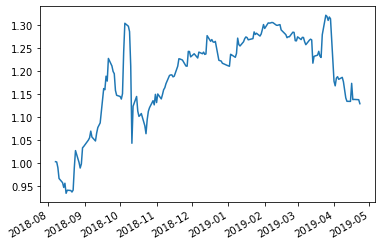

In [239]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio
new_port_covar_roll60day = orig_with_new_port["New Portfolio"].rolling(window=60).cov(orig_with_new_port["S&P 500"])

# Calculate variance of S&P 500
new_port_sp500_var_roll60day = orig_with_new_port["S&P 500"].rolling(window=60).var()


# Computing beta
new_port_beta_roll60day = new_port_covar_roll60day / new_port_sp500_var_roll60day

# Plot beta trend
new_port_beta_roll60day.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [240]:
# Calculate Annualzied Sharpe Ratios
orig_with_new_port_sharpe = (orig_with_new_port.mean() * 252) / (orig_with_new_port.std() * np.sqrt(252))
orig_with_new_port_sharpe

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
New Portfolio                  0.933123
dtype: float64

<AxesSubplot:>

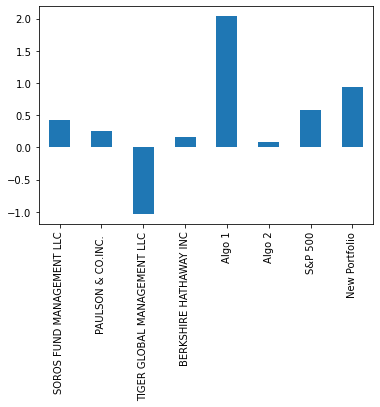

In [241]:
# Visualize the sharpe ratios as a bar plot
orig_with_new_port_sharpe.plot.bar()

<AxesSubplot:>

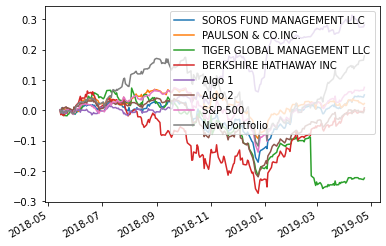

In [242]:
# Added cell to plot the cummulative return over time

# Calculate cumulative returns of all portfolios
new_cumulative_returns = (1+orig_with_new_port).cumprod()-1

# Plot cumulative returns
new_cumulative_returns.plot()

### How does your portfolio do?

The new portfolio is a market beater with a Sharpe ratio of 0.93, and it outperforms all of the whales (highest is Soros Fund at 0.43 Sharpe) and the S&P 500 (Sharpe ratio of 0.58).  While it does beat the whales and the market, it does not reach a 1.0, which is the typical point at which an investment can be considered good.  Additionally, the original Algorithim 1 was an even stronger performer and with a Sharpe ratio of 2.04 it more than doubles the ratio of the new portfolio. Overall, compared to all other investment options, this new portfolio is one of the stronger contenders, although the preference would be to invest in Algorithim 1.